<a href="https://colab.research.google.com/github/ujwal23/Insurance-Fraud-Detection-using-ML/blob/main/insurance_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [ ]:
dataframe = pd.read_csv('/content/insurance_claims (1).csv')


In [ ]:
dataframe.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
dataframe.replace('0', np.nan, inplace = True)
dataframe.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
dataframe.isna().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

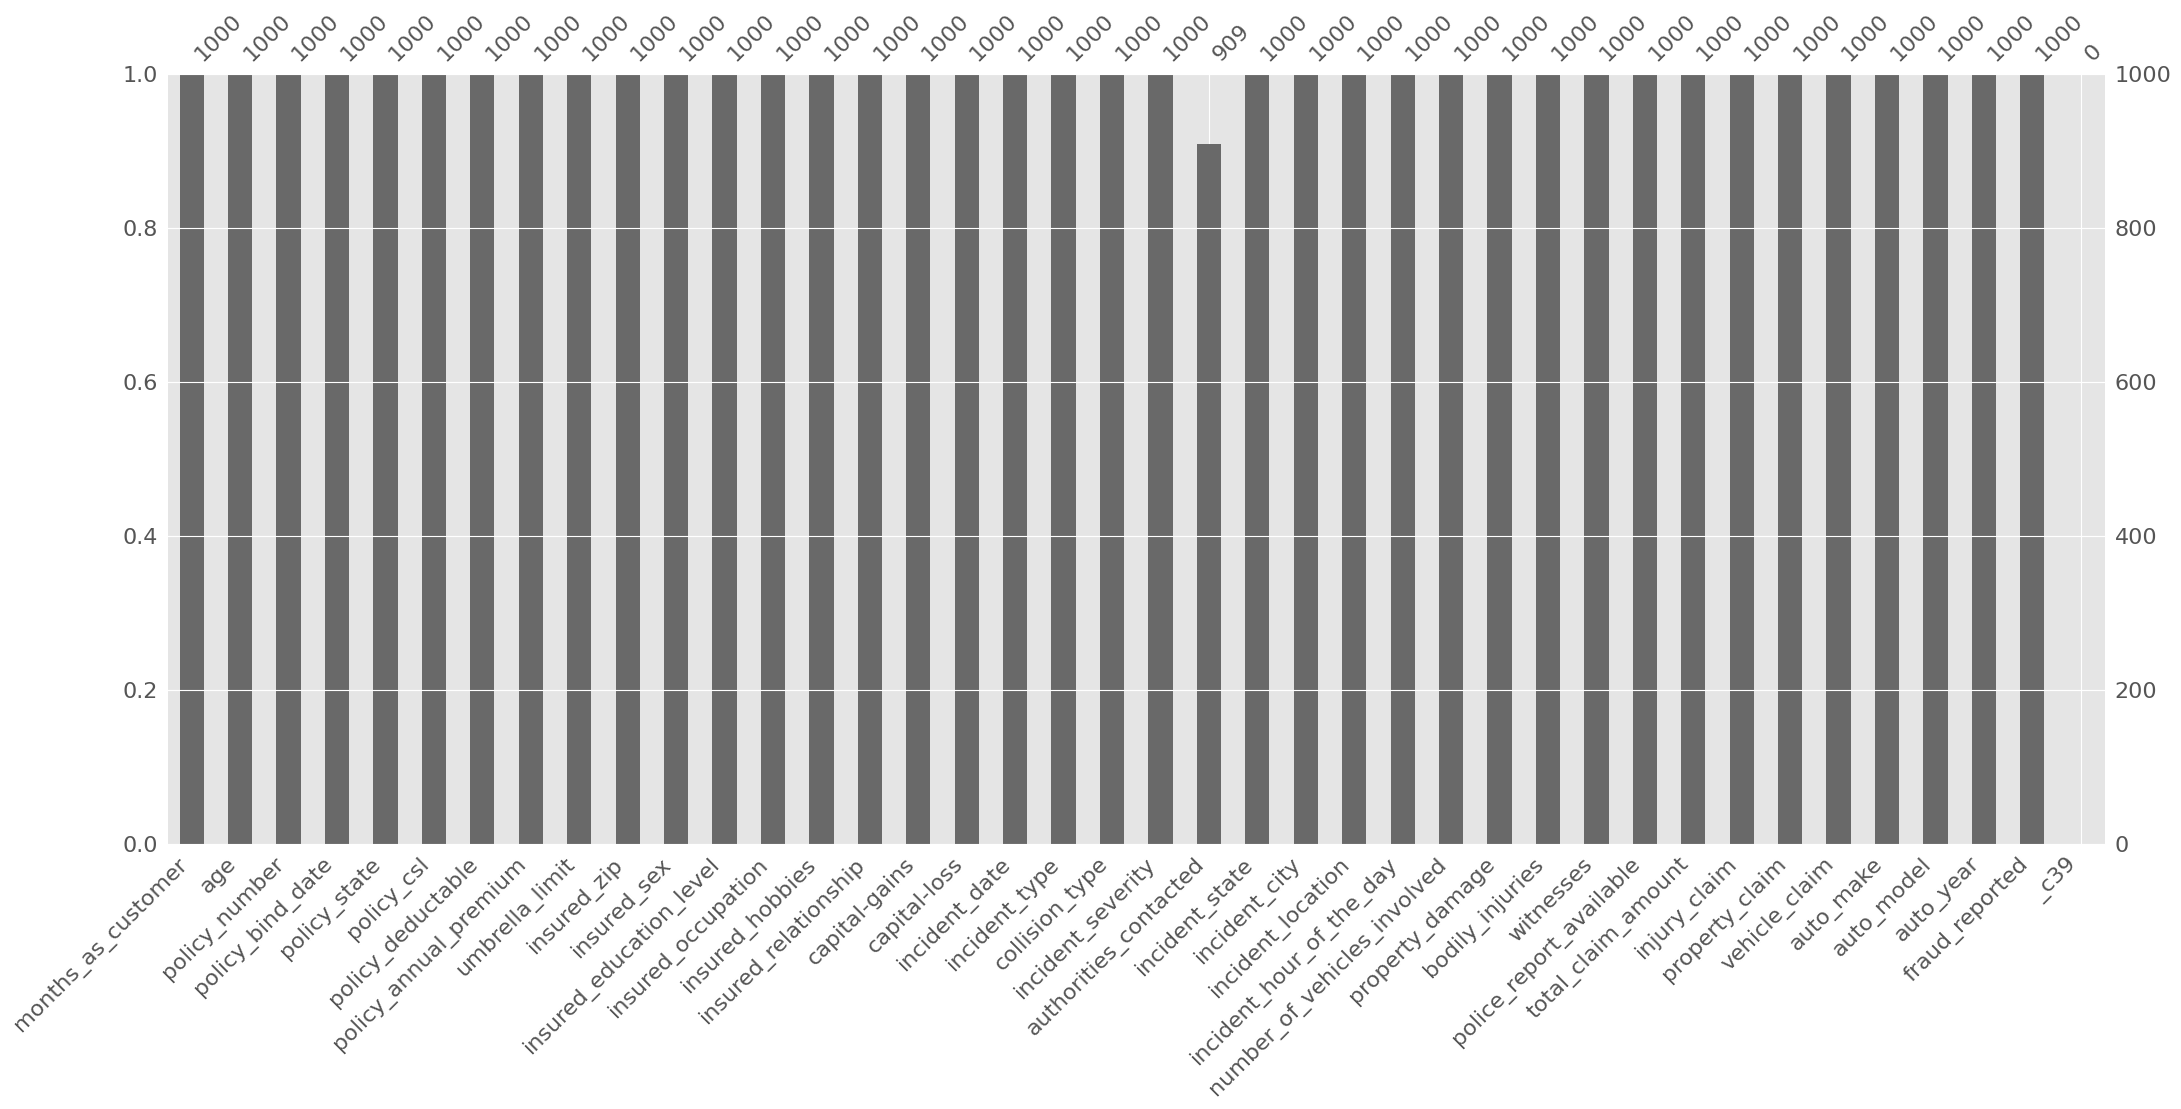

In [ ]:
import missingno as msno

msno.bar(dataframe)
plt.show()

In [ ]:
dataframe['collision_type'] = dataframe['collision_type'].fillna(dataframe['collision_type'].mode()[0])
dataframe['property_damage'] = dataframe['property_damage'].fillna(dataframe['property_damage'].mode()[0])
dataframe['police_report_available'] = dataframe['police_report_available'].fillna(dataframe['police_report_available'].mode()[0])

dataframe.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

HEATMAP

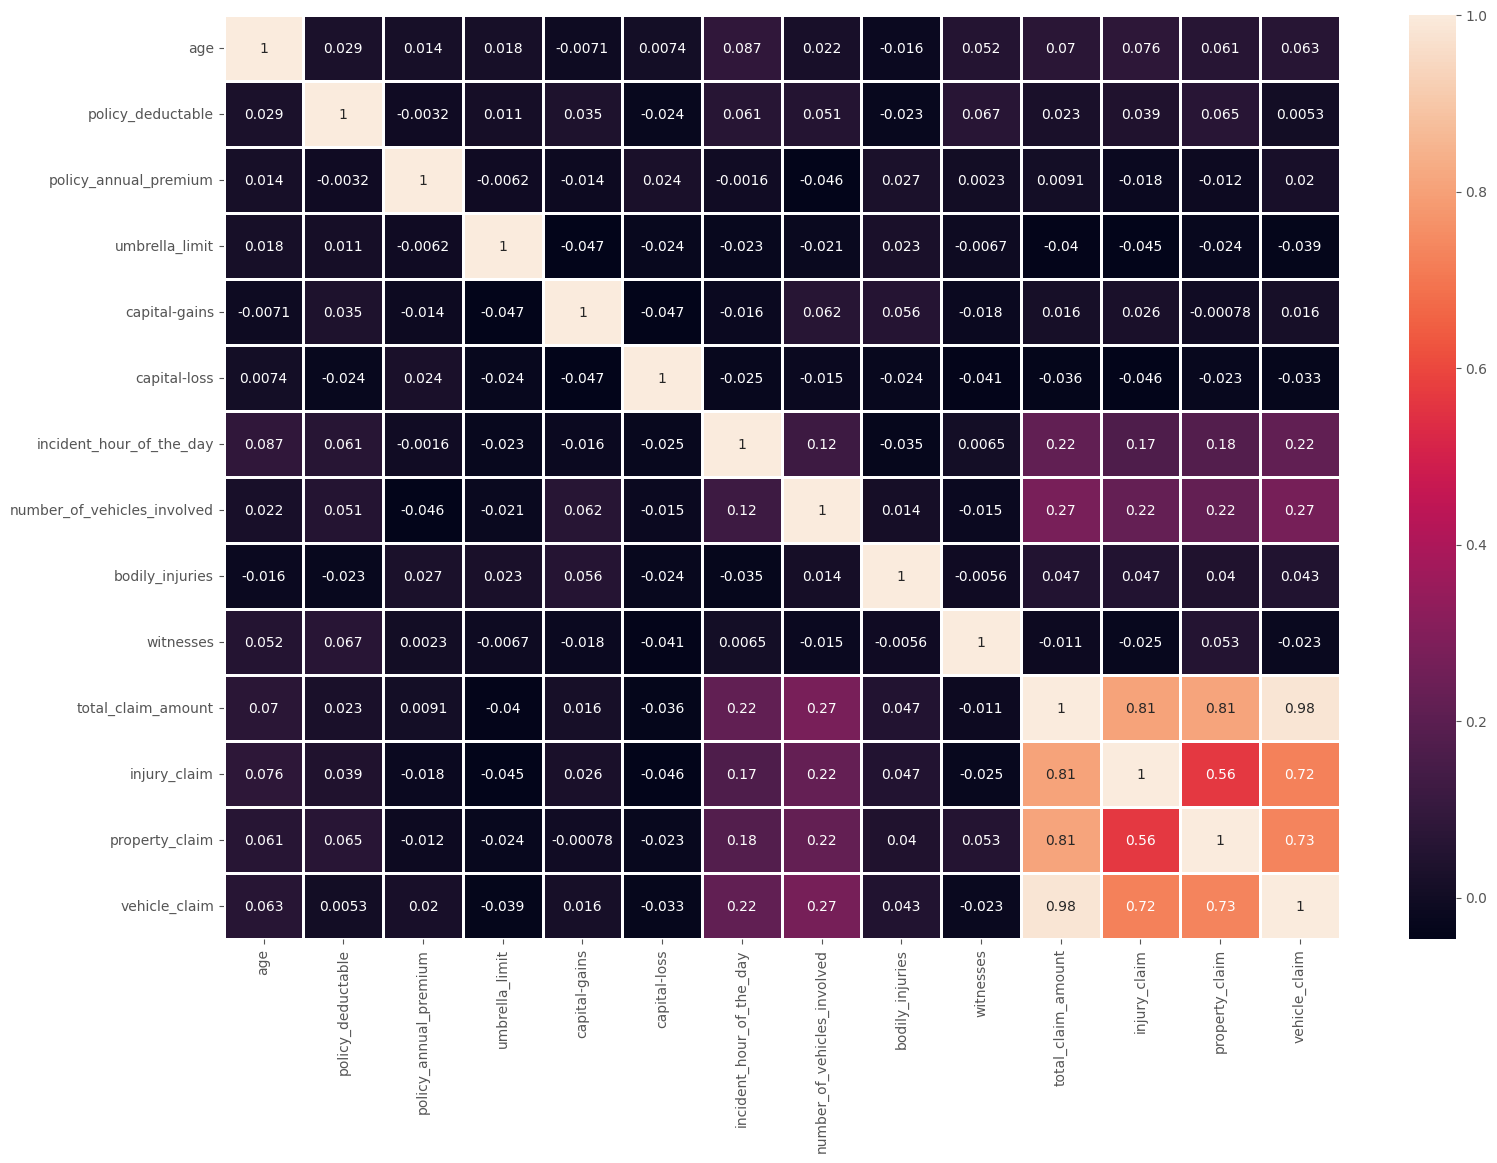

In [ ]:
plt.figure(figsize=(18, 12))

# Drop non-numeric columns before calculating the correlation matrix
numeric_df = dataframe.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()



In [ ]:
dataframe.nunique()


age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries             

In [ ]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

dataframe.drop(to_drop, inplace = True, axis = 1)
dataframe.head()

,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,?,0,0,?,5070,780,780,3510,Y
2,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,1,NO,0,1,NO,6500,1300,650,4550,N


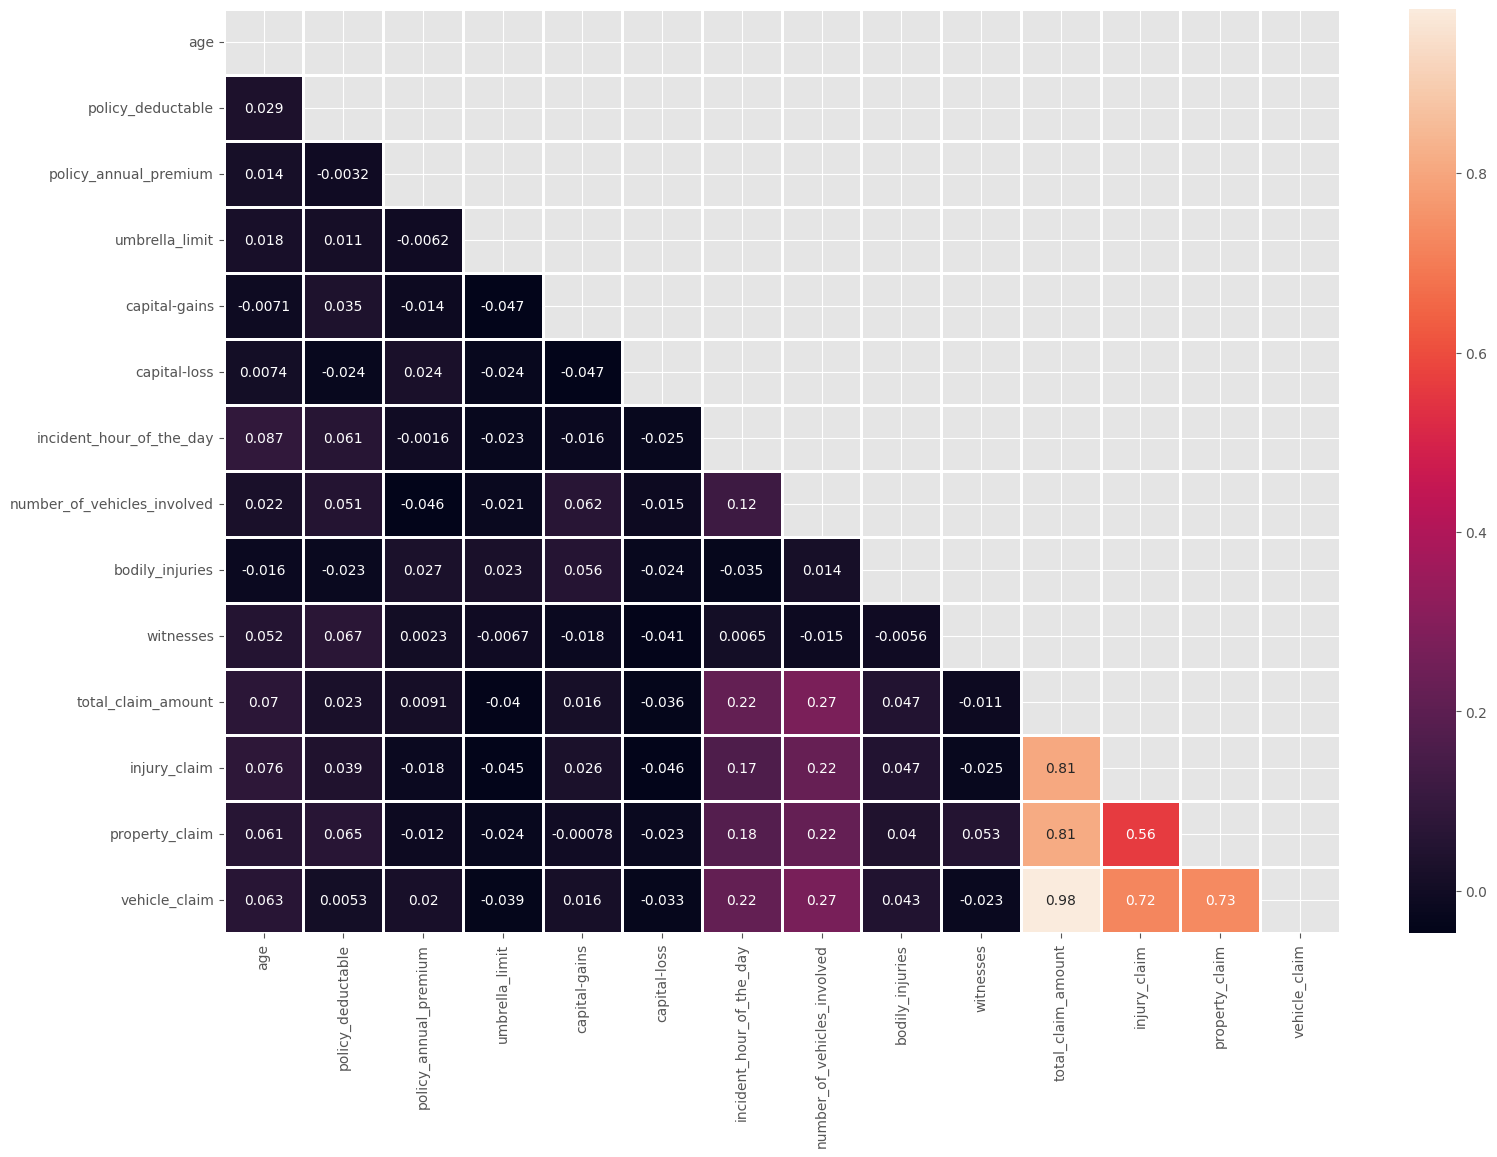

In [ ]:

plt.figure(figsize=(18, 12))
numeric_df = dataframe.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2g', linewidth=1)
plt.show()



In [ ]:
dataframe.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
dataframe.head()

,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,...,8,1,?,0,0,?,780,780,3510,Y
2,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [ ]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_csl                   1000 non-null   object 
 1   policy_deductable            1000 non-null   int64  
 2   policy_annual_premium        1000 non-null   float64
 3   umbrella_limit               1000 non-null   int64  
 4   insured_sex                  1000 non-null   object 
 5   insured_education_level      1000 non-null   object 
 6   insured_occupation           1000 non-null   object 
 7   insured_relationship         1000 non-null   object 
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_type                1000 non-null   object 
 11  collision_type               1000 non-null   object 
 12  incident_severity            1000 non-null   object 
 13  authorities_contact

In [ ]:
X = dataframe.drop('fraud_reported', axis = 1)
y = dataframe['fraud_reported']

In [ ]:
dataframe_cat = X.select_dtypes(include = ['object'])

In [ ]:
dataframe_cat.head()


,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,?,Minor Damage,NaN,NO,NO


In [ ]:
for col in dataframe_cat.columns:
    print(f"{col}: \n{dataframe_cat[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']



In [ ]:
dataframe_cat = pd.get_dummies(dataframe_cat, drop_first = True)
dataframe_cat.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [ ]:
dataframe_num = X.select_dtypes(include = ['int64'])
dataframe_num.head()


,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,2000,5000000,0,0,8,1,0,0,780,780,3510
2,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [ ]:
X = pd.concat([dataframe_num, dataframe_cat], axis = 1)
X.head()

,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1000,0,53300,0,5,1,1,2,6510,13020,...,False,False,False,False,False,True,False,True,False,True
1,2000,5000000,0,0,8,1,0,0,780,780,...,True,False,False,False,False,True,False,False,False,False
2,2000,5000000,35100,0,7,3,2,3,7700,3850,...,True,False,False,False,False,True,True,False,True,False
3,2000,6000000,48900,-62400,5,1,1,2,6340,6340,...,False,False,False,False,False,True,False,False,True,False
4,1000,6000000,66000,-46000,20,1,0,1,1300,650,...,True,False,False,False,False,False,True,False,True,False


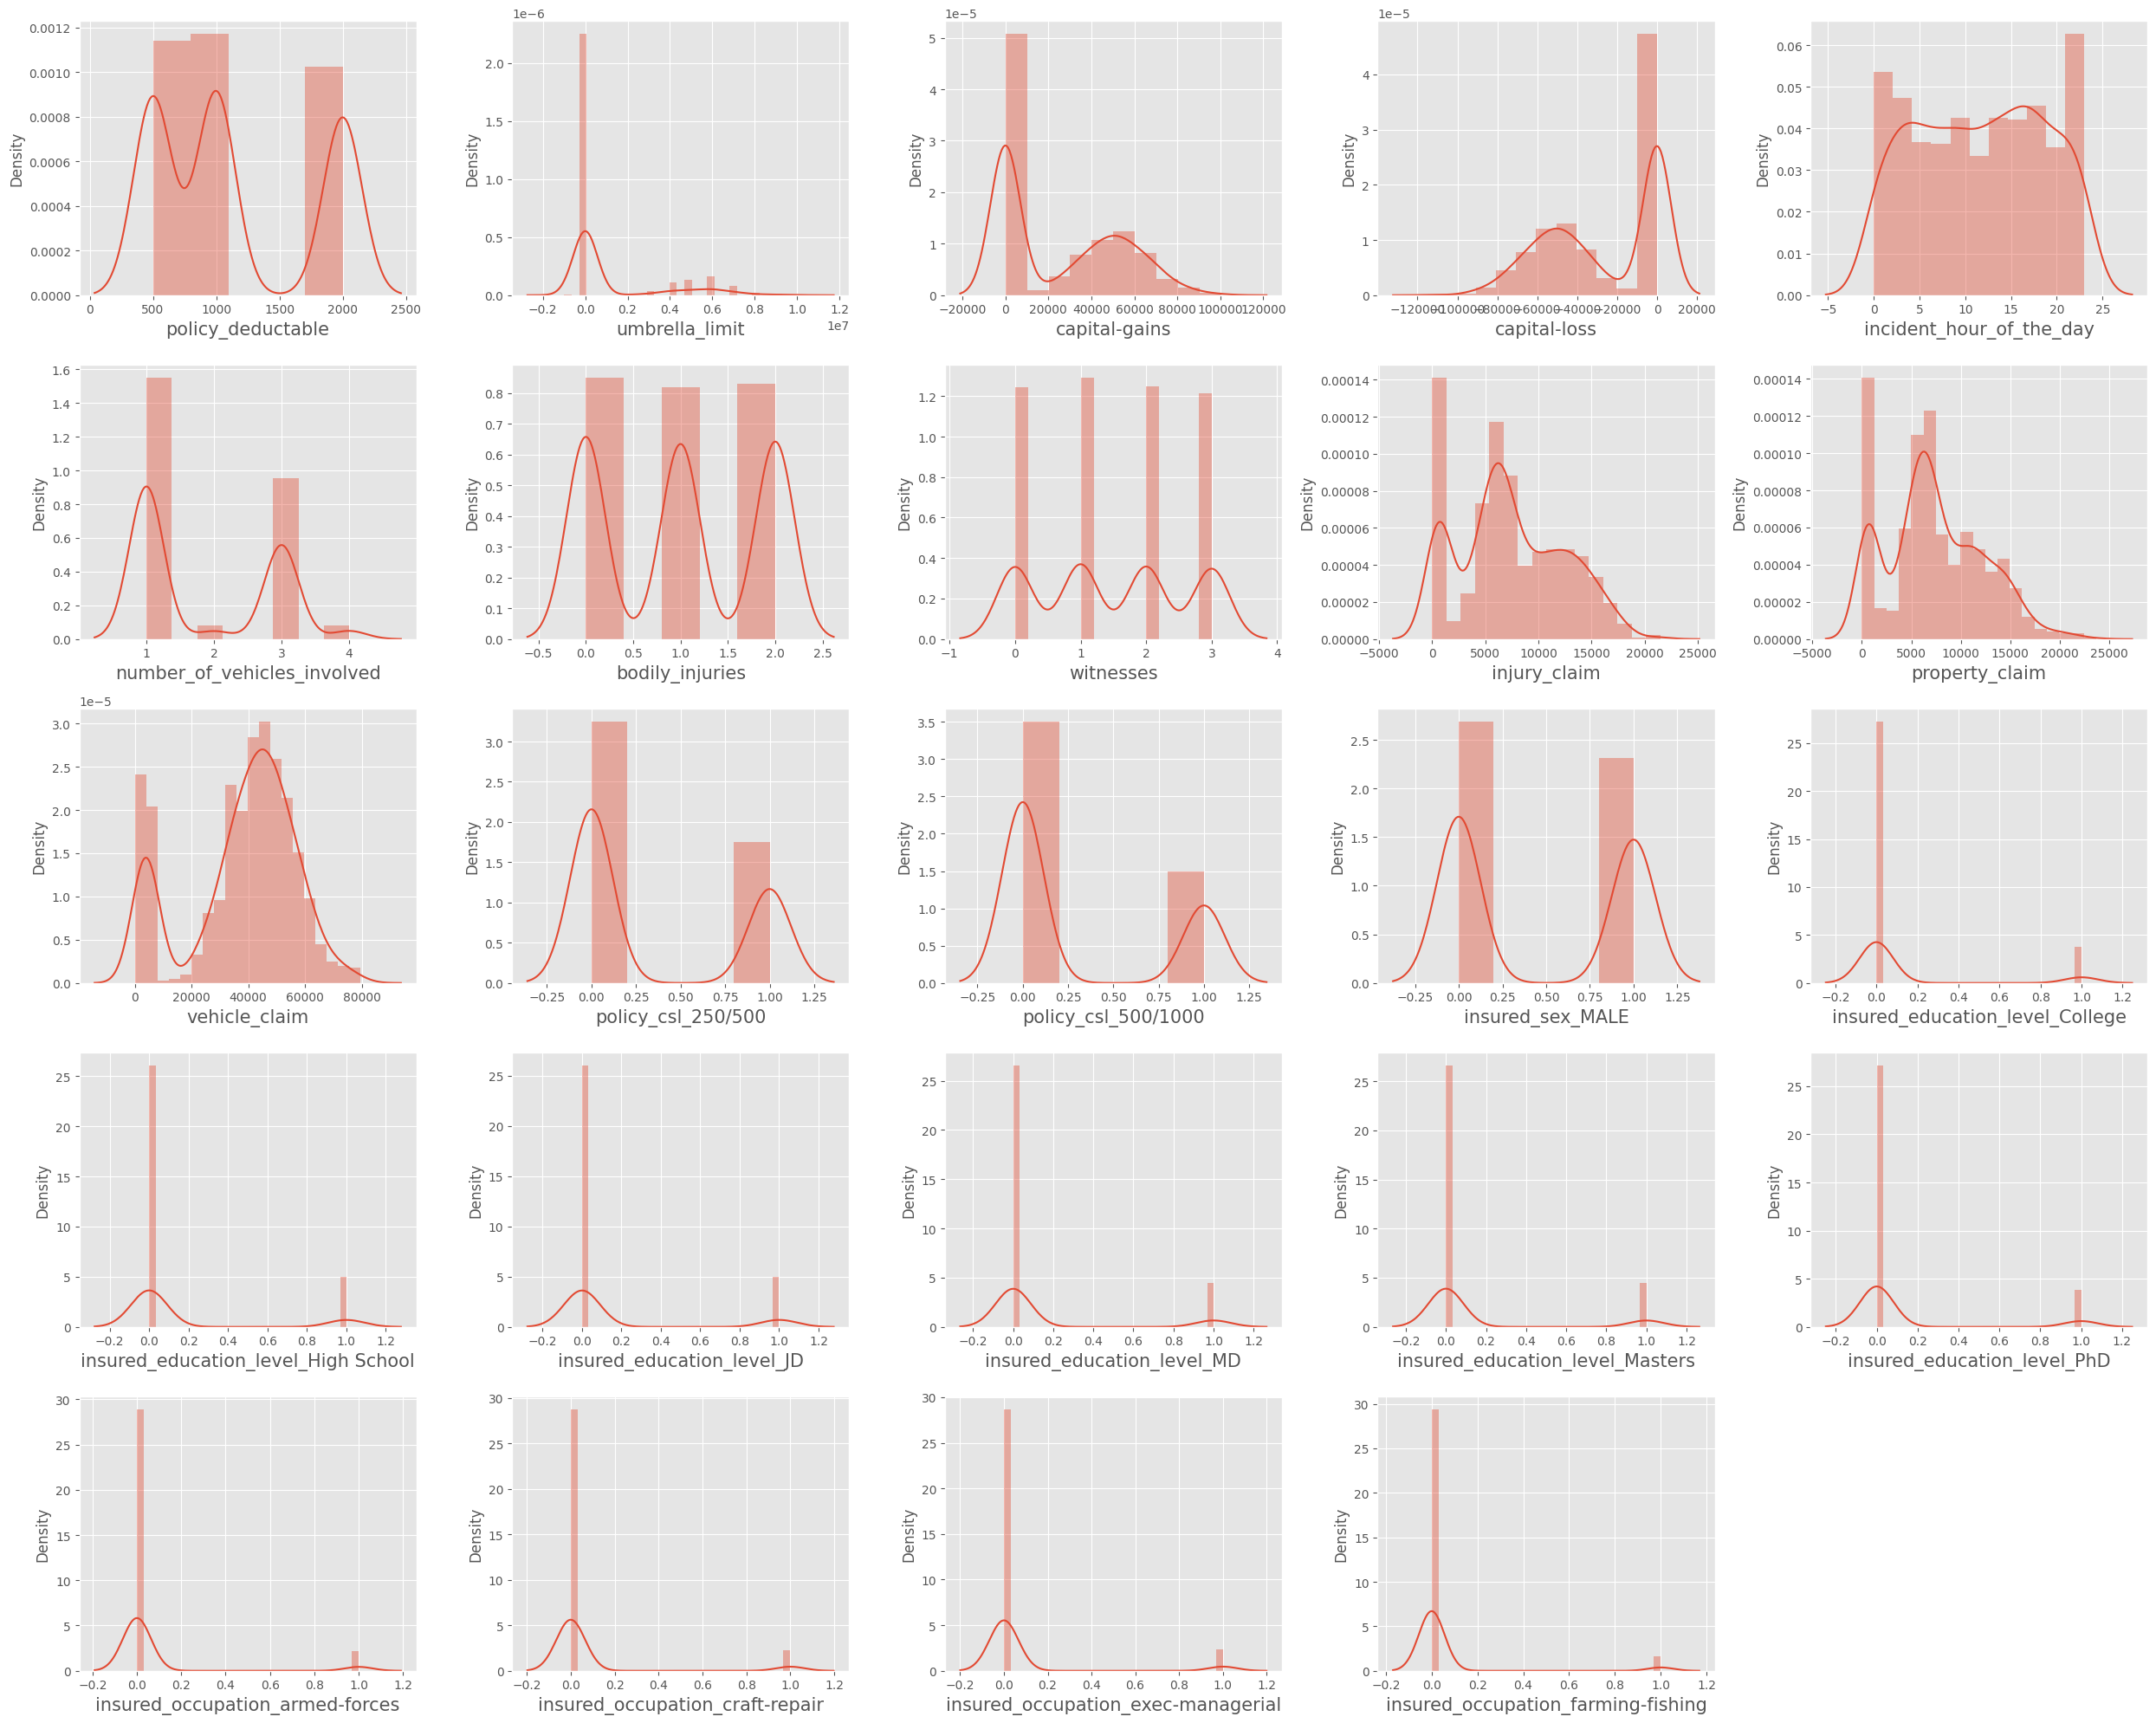

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

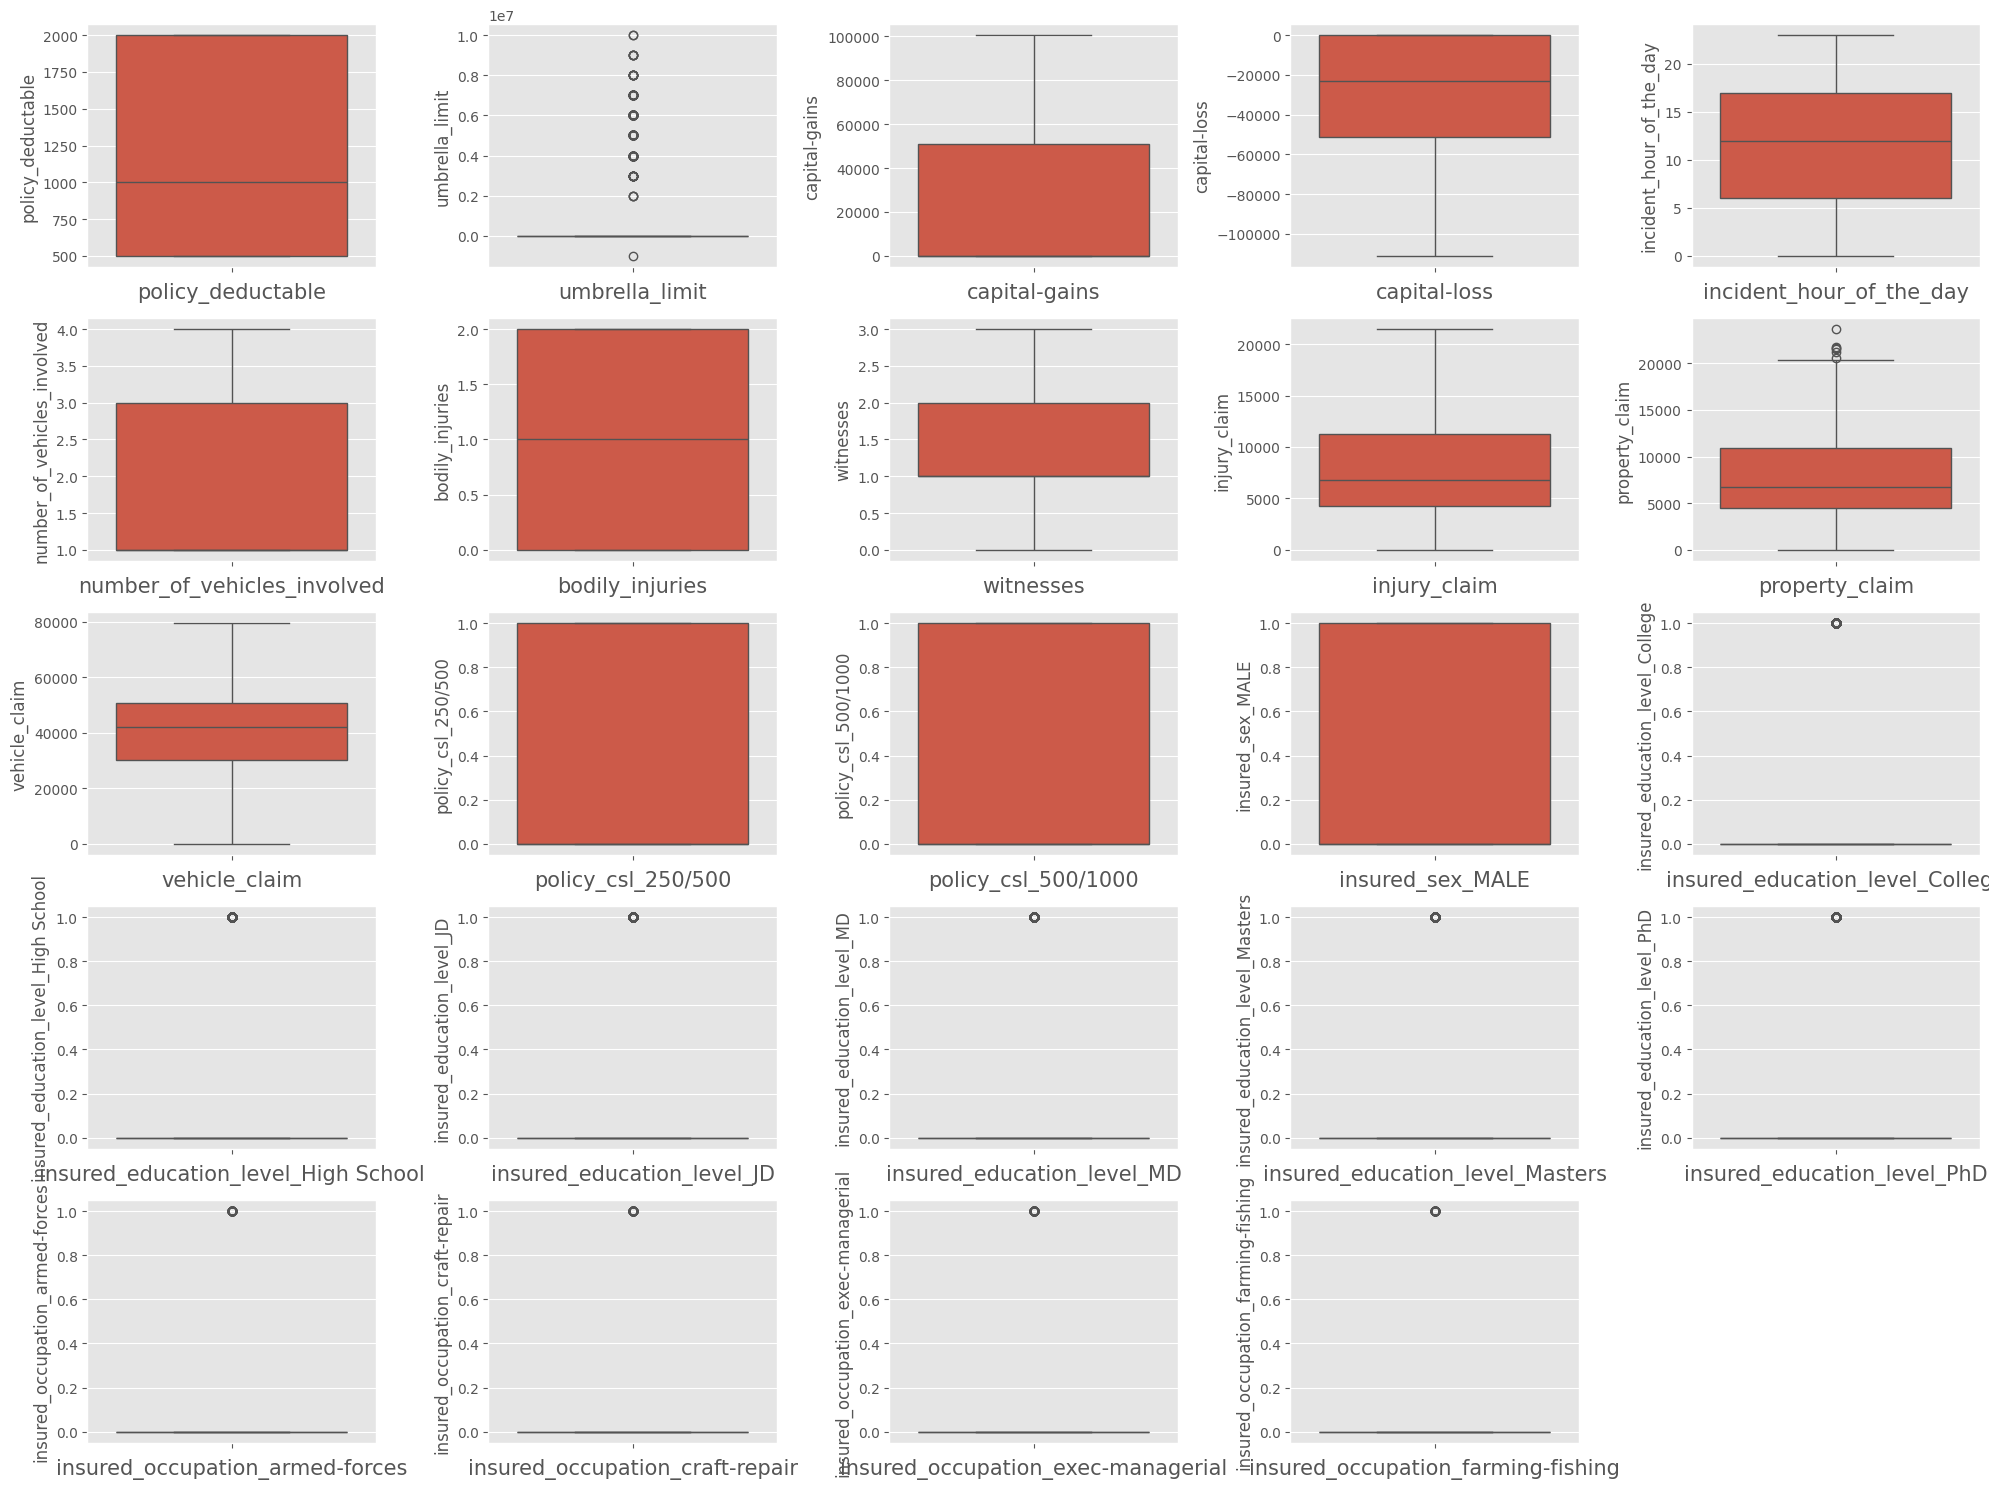

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()

,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
37,2000,0,0,0,16,1,1,1,1230,820,...,True,False,False,False,False,False,True,False,False,True
251,500,5000000,0,0,2,3,1,2,7350,14700,...,False,False,False,False,False,True,True,False,True,False
361,500,0,47400,0,15,3,2,1,9360,9360,...,False,False,False,False,False,False,False,True,False,False
158,1000,0,29000,0,17,3,2,0,13040,13040,...,False,True,False,False,False,False,False,False,False,False
369,500,0,69400,0,15,4,0,1,15560,15560,...,False,False,False,False,True,False,False,True,False,False


In [ ]:
dataframe_num= X_train[[ 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe_num)
scaled_dataframe_num = pd.DataFrame(data = scaled_data, columns = dataframe_num.columns, index = X_train.index)
scaled_dataframe_num.head()

,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
37,1.410463,-0.465622,-0.897234,0.91942,0.626352,-0.822046,0.023243,-0.455047,-1.276195,-1.349474,-1.815966
251,-1.030723,1.739027,-0.897234,0.91942,-1.399116,1.141439,0.023243,0.455047,-0.007848,1.572875,1.110942
361,-1.030723,-0.465622,0.822282,0.91942,0.481675,1.141439,1.268403,-0.455047,0.408717,0.448571,0.478325
158,-0.216994,-0.465622,0.154790,0.91942,0.771028,1.141439,1.268403,-1.365141,1.171384,1.223372,0.760894
369,-1.030723,-0.465622,1.620369,0.91942,0.481675,2.123182,-1.221917,-0.455047,1.693645,1.753942,0.471999


In [ ]:
X_train.drop(columns = scaled_dataframe_num.columns, inplace = True)
X_train = pd.concat([scaled_dataframe_num, X_train], axis = 1)
X_train.head()

,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
37,1.410463,-0.465622,-0.897234,0.91942,0.626352,-0.822046,0.023243,-0.455047,-1.276195,-1.349474,...,True,False,False,False,False,False,True,False,False,True
251,-1.030723,1.739027,-0.897234,0.91942,-1.399116,1.141439,0.023243,0.455047,-0.007848,1.572875,...,False,False,False,False,False,True,True,False,True,False
361,-1.030723,-0.465622,0.822282,0.91942,0.481675,1.141439,1.268403,-0.455047,0.408717,0.448571,...,False,False,False,False,False,False,False,True,False,False
158,-0.216994,-0.465622,0.154790,0.91942,0.771028,1.141439,1.268403,-1.365141,1.171384,1.223372,...,False,True,False,False,False,False,False,False,False,False
369,-1.030723,-0.465622,1.620369,0.91942,0.481675,2.123182,-1.221917,-0.455047,1.693645,1.753942,...,False,False,False,False,True,False,False,True,False,False


SVC CLASSIFIER

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
acc_svc_train = accuracy_score(y_train, svc.predict(X_train))
acc_svc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {acc_svc_train}")
print(f"Test accuracy of Support Vector Classifier is : {acc_svc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8533333333333334
Test accuracy of Support Vector Classifier is : 0.724
[[181   0]
 [ 69   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       181
           Y       0.00      0.00      0.00        69

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.61       250



KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_knn_train = accuracy_score(y_train, knn.predict(X_train))
acc_knn_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {acc_knn_train}")
print(f"Test accuracy of KNN is : {acc_knn_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7626666666666667
Test accuracy of KNN is : 0.724
[[181   0]
 [ 69   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       181
           Y       0.00      0.00      0.00        69

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.61       250



DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_dt_train = accuracy_score(y_train, dt.predict(X_train))
acc_dt_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {acc_dt_train}")
print(f"Test accuracy of Decision Tree is : {acc_dt_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.616
[[147  34]
 [ 62   7]]
              precision    recall  f1-score   support

           N       0.70      0.81      0.75       181
           Y       0.17      0.10      0.13        69

    accuracy                           0.62       250
   macro avg       0.44      0.46      0.44       250
weighted avg       0.56      0.62      0.58       250



In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

search_grid = GridSearchCV(dt, params_grid, cv = 5, n_jobs = -1, verbose = 1)
search_grid.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
print(search_grid.best_params_)
print(search_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.8186666666666668


In [ ]:
dt = search_grid.best_estimator_

y_pred = dt.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_dt_train = accuracy_score(y_train, dt.predict(X_train))
acc_dt_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {acc_dt_train}")
print(f"Test accuracy of Decision Tree is : {acc_dt_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8186666666666667
Test accuracy of Decision Tree is : 0.788
[[153  28]
 [ 25  44]]
              precision    recall  f1-score   support

           N       0.86      0.85      0.85       181
           Y       0.61      0.64      0.62        69

    accuracy                           0.79       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.79      0.79      0.79       250



RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_rfc_train = accuracy_score(y_train, rfc.predict(X_train))
acc_rfc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {acc_rfc_train}")
print(f"Test accuracy of Random Forest is : {acc_rfc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9693333333333334
Test accuracy of Random Forest is : 0.72
[[169  12]
 [ 58  11]]
              precision    recall  f1-score   support

           N       0.74      0.93      0.83       181
           Y       0.48      0.16      0.24        69

    accuracy                           0.72       250
   macro avg       0.61      0.55      0.53       250
weighted avg       0.67      0.72      0.67       250



ADA BOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dt)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

search_grid = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
search_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=3,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
print(search_grid.best_params_)
print(search_grid.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 70}
0.8186666666666668


In [ ]:
ada = search_grid.best_estimator_

y_pred = ada.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

acc_ada_train = accuracy_score(y_train, ada.predict(X_train))
acc_ada_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {acc_ada_train}")
print(f"Test accuracy of Ada Boost is : {acc_ada_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8186666666666667
Test accuracy of Ada Boost is : 0.716
[[133  48]
 [ 23  46]]
              precision    recall  f1-score   support

           N       0.85      0.73      0.79       181
           Y       0.49      0.67      0.56        69

    accuracy                           0.72       250
   macro avg       0.67      0.70      0.68       250
weighted avg       0.75      0.72      0.73       250



GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix, and classification report of gradient boosting classifier

acc_gb = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {acc_gb} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9413333333333334
Test Accuracy of Gradient Boosting Classifier is 0.548 

Confusion Matrix :- 
[[97 84]
 [29 40]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.77      0.54      0.63       181
           Y       0.32      0.58      0.41        69

    accuracy                           0.55       250
   macro avg       0.55      0.56      0.52       250
weighted avg       0.65      0.55      0.57       250



In [ ]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix, and classification report of stochastic gradient boosting classifier

acc_sgb = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {acc_sgb} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.9373333333333334
Test Accuracy of Stochastic Gradient Boosting is 0.48 

Confusion Matrix :- 
[[ 61 120]
 [ 10  59]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.86      0.34      0.48       181
           Y       0.33      0.86      0.48        69

    accuracy                           0.48       250
   macro avg       0.59      0.60      0.48       250
weighted avg       0.71      0.48      0.48       250



XGB CLASSIFIER

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable y
y_encoded = label_encoder.fit_transform(y)

# Now split the encoded y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25)

# Proceed with your XGBoost classifier training and evaluation
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb.predict(X_test)
acc_xgb_train = accuracy_score(y_train, xgb.predict(X_train))
acc_xgb_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {acc_xgb_train}")
print(f"Test accuracy of XgBoost is : {acc_xgb_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from xgboost import XGBClassifier



Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.736
[[154  21]
 [ 45  30]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       175
           1       0.59      0.40      0.48        75

    accuracy                           0.74       250
   macro avg       0.68      0.64      0.65       250
weighted avg       0.72      0.74      0.72       250



In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    "n_estimators": [10, 50, 100, 130],
    "criterion": ['gini', 'entropy'],
    "max_depth": range(2, 10, 1)
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Initialize GridSearchCV with the XGBoost classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

CATBOOST CLASSIFIER

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5593765	total: 50.4ms	remaining: 454ms
1:	learn: 0.4439062	total: 62.7ms	remaining: 251ms
2:	learn: 0.4166403	total: 69.2ms	remaining: 161ms
3:	learn: 0.3949052	total: 76.7ms	remaining: 115ms
4:	learn: 0.3639626	total: 86.7ms	remaining: 86.7ms
5:	learn: 0.3364722	total: 91.8ms	remaining: 61.2ms
6:	learn: 0.3210164	total: 99.6ms	remaining: 42.7ms
7:	learn: 0.3111521	total: 107ms	remaining: 26.8ms
8:	learn: 0.2923537	total: 115ms	remaining: 12.8ms
9:	learn: 0.2728877	total: 123ms	remaining: 0us


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.8 MB/s eta 0:00:00


In [ ]:
acc_cat = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {acc_cat} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.908
Test Accuracy of Cat Boost Classifier is 0.716 

Confusion Matrix :- 
[[163  12]
 [ 59  16]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       175
           1       0.57      0.21      0.31        75

    accuracy                           0.72       250
   macro avg       0.65      0.57      0.57       250
weighted avg       0.69      0.72      0.67       250



EXTRA TREES CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix, and classification report of extra trees classifier

acc_etc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {acc_etc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.728 

Confusion Matrix :- 
[[167   8]
 [ 60  15]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       175
           1       0.65      0.20      0.31        75

    accuracy                           0.73       250
   macro avg       0.69      0.58      0.57       250
weighted avg       0.71      0.73      0.67       250



LGBMC CLASSIFIER

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix, and classification report of lgbm classifier

acc_lgbm = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {acc_lgbm} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 172, number of negative: 578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.229333 -> initscore=-1.212079
[LightGBM] [Info] Start training from score -1.212079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

VOTING CLASSIFIER

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dt), ('Random Forest', rfc),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5593765	total: 1.73ms	remaining: 15.6ms
1:	learn: 0.4439062	total: 12.8ms	remaining: 51.3ms
2:	learn: 0.4166403	total: 20.7ms	remaining: 48.4ms
3:	learn: 0.3949052	total: 27ms	remaining: 40.5ms
4:	learn: 0.3639626	total: 33.8ms	remaining: 33.8ms
5:	learn: 0.3364722	total: 39.4ms	remaining: 26.2ms
6:	learn: 0.3210164	total: 65ms	remaining: 27.9ms
7:	learn: 0.3111521	total: 69.8ms	remaining: 17.5ms
8:	learn: 0.2923537	total: 84.5ms	remaining: 9.39ms
9:	learn: 0.2728877	total: 94.2ms	remaining: 0us
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 172, number of negative: 578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train se

In [ ]:
vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9373333333333334
Test accuracy of Voting Classifier is : 0.74
[[161  14]
 [ 51  24]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       175
           1       0.63      0.32      0.42        75

    accuracy                           0.74       250
   macro avg       0.70      0.62      0.63       250
weighted avg       0.72      0.74      0.71       250



In [ ]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM', 'XgBoost', 'Voting Classifier'],
    'Score' : [acc_svc_test, acc_knn_test, acc_dt_test, acc_rfc_test, acc_ada_test, acc_gb, acc_sgb, acc_cat, acc_etc, acc_lgbm, acc_xgb_test, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.788
9,LGBM,0.744
11,Voting Classifier,0.740
10,XgBoost,0.736
8,Extra Trees,0.728
0,SVC,0.724
1,KNN,0.724
3,Random Forest,0.720
4,Ada Boost,0.716
7,Cat Boost,0.716


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')